In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("Airbnb_NYC_data_kaggle.csv")

In [4]:
df.head(3).T

,0,1,2
id,2539,2595,3647
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !
host_id,2787,2845,4632
host_name,John,Jennifer,Elisabeth
neighbourhood_group,Brooklyn,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
room_type,Private room,Entire home/apt,Private room
price,149,225,150


In [5]:
df.shape

(48895, 16)

In [13]:
df['id'].value_counts()

2539        1
25583366    1
25551687    1
25552076    1
25554120    1
           ..
13121809    1
13122135    1
13122318    1
13122932    1
36487245    1
Name: id, Length: 48895, dtype: int64

In [14]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [27]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [31]:
df['room_type'] = df['room_type'].str.lower().str.replace(" ","_")

In [32]:
df['room_type'].value_counts()

entire_home/apt    25409
private_room       22326
shared_room         1160
Name: room_type, dtype: int64

<AxesSubplot:>

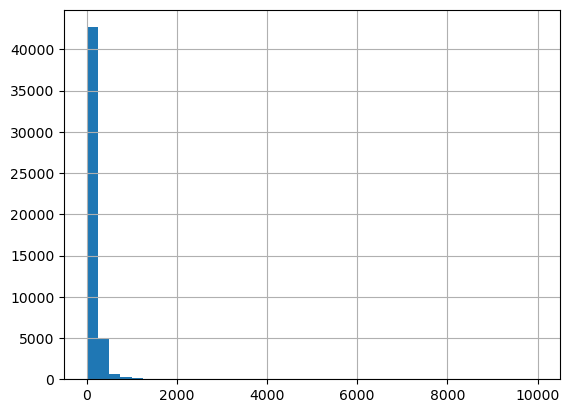

In [35]:
df['price'].hist(bins = 40)

<AxesSubplot:>

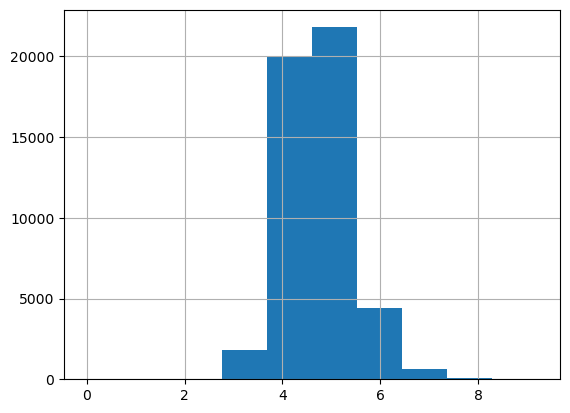

In [37]:
log_price = np.log1p(df['price'])
log_price.hist()

In [39]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [109]:
categorical = ['neighbourhood_group' , 'neighbourhood' , 'room_type']

In [110]:
categorical

['neighbourhood_group', 'neighbourhood', 'room_type']

In [111]:
df.dtypes == 'float64'

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                           True
longitude                          True
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [112]:
numerical = list(df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].index)

In [113]:
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [114]:
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [115]:
df_keep = df[categorical+numerical]

In [116]:
df_keep.fillna(0)

,neighbourhood_group,neighbourhood,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,private_room,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Midtown,entire_home/apt,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Harlem,private_room,3647,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,entire_home/apt,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,East Harlem,entire_home/apt,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,private_room,36484665,8232441,40.67853,-73.94995,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,private_room,36485057,6570630,40.70184,-73.93317,40,4,0,0.00,2,36
48892,Manhattan,Harlem,entire_home/apt,36485431,23492952,40.81475,-73.94867,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,shared_room,36485609,30985759,40.75751,-73.99112,55,1,0,0.00,6,2


In [117]:
df_keep.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [118]:
df_keep['reviews_per_month'] = df_keep['reviews_per_month'].replace(np.nan, 0)

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_keep.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [120]:
df_keep['neighbourhood_group'] = df_keep['neighbourhood_group'].str.lower().str.replace(" ","_")

C:\Users\Prashanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_keep['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

In [122]:
del df_keep['neighbourhood']

In [123]:
df_keep.dtypes

neighbourhood_group                object
room_type                          object
id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [124]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
host_id,2787,2845,4632
latitude,40.64749,40.75362,40.80902
longitude,-73.97237,-73.98377,-73.9419
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0


In [125]:
del df_keep['latitude']
del df_keep['longitude']

In [126]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
host_id,2787,2845,4632
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [127]:
del df_keep['host_id']

In [128]:
df_keep.head(3).T

,0,1,2
neighbourhood_group,brooklyn,manhattan,manhattan
room_type,private_room,entire_home/apt,private_room
id,2539,2595,3647
price,149,225,150
minimum_nights,1,1,3
number_of_reviews,9,45,0
reviews_per_month,0.21,0.38,0.0
calculated_host_listings_count,6,2,1
availability_365,365,355,365


In [129]:
df_keep.isnull().sum()

neighbourhood_group               0
room_type                         0
id                                0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [132]:
from sklearn.model_selection import train_test_split
df_, df_test = train_test_split(df_keep, test_size=0.2,
                               random_state = 1)
df_train, df_val = train_test_split(df_, test_size = 0.25, 
                                    random_state=1)

df_train.shape, df_test.shape, df_val.shape

((29337, 9), (9779, 9), (9779, 9))

In [134]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [135]:
y_train = df_train['price']
y_test = df_test['price']
y_val = df_val['price']

In [136]:
del df_train['price']
del df_test['price']
del df_val['price']

In [141]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
y_val = np.log1p(y_val)

In [143]:
from sklearn.feature_extraction import DictVectorizer

In [144]:
dv = DictVectorizer(sparse=False)

In [145]:
df_train_dicts = df_train.to_dict(orient="records")

In [146]:
dv.fit_transform(df_train_dicts)

array([[3.6300000e+02, 1.0000000e+00, 1.1574800e+05, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.6155827e+07, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.1300000e+02, 5.0000000e+00, 2.6837745e+07, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7800000e+02, 2.0000000e+00, 3.1234360e+07, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.3847244e+07, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.6200000e+02, 2.3000000e+01, 1.8094311e+07, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [147]:
dv.get_feature_names()

C:\Users\Prashanth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['availability_365',
 'calculated_host_listings_count',
 'id',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [100]:
#converted df_train to dictionary and did one hot encoding

##next step is to fit model, transform the df_val and check predictions